In [0]:
import pandas as pd
train_df=pd.read_csv('/content/train_ctrUa4K.csv')

In [0]:
test_df=pd.read_csv('/content/test_lAUu6dG.csv')

In [386]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [387]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [388]:
train_df.shape

(614, 13)

**DATA DICT**
Variable-	Description

Loan_ID-	Unique Loan ID

Gender-	Male/ Female

Married	Applicant married- (Y/N)

Dependents	-Number of dependents

Education	Applicant- Education (Graduate/ Under Graduate)

Self_Employed	Self employed (Y/N)

ApplicantIncome	Applicant income

CoapplicantIncome	Coapplicant income

LoanAmount	Loan amount in thousands

Loan_Amount_Term	Term of loan in months

Credit_History	credit history meets guidelines

Property_Area	Urban/ Semi Urban/ Rural

Loan_Status	(Target) Loan approved (Y/N)

*supervised,classification*

In [389]:
train_df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


EDA

In [390]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [391]:
train_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [392]:
train_df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [393]:
train_df['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [394]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

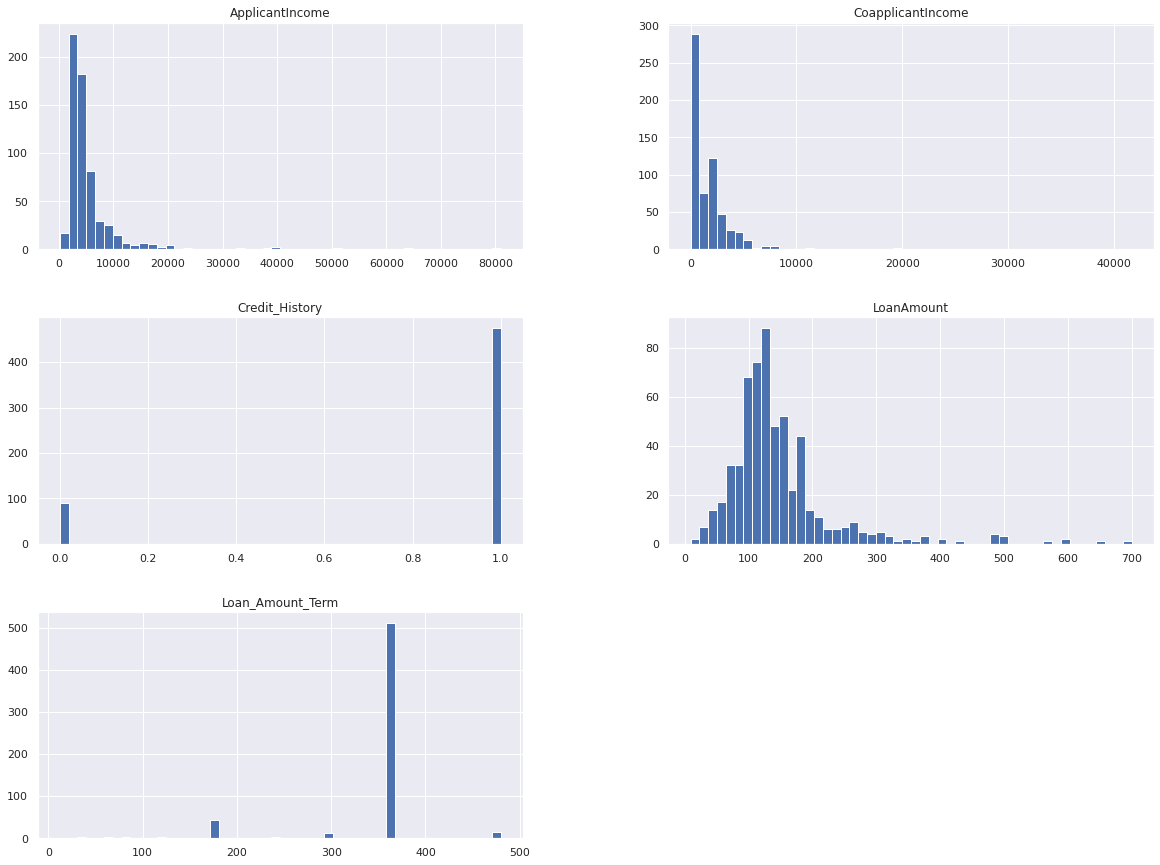

In [395]:

%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))

plt.show()

In [396]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [397]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [0]:
def bar_chart(feature):
    granted = train_df[train_df['Loan_Status']=='Y'][feature].value_counts()
    notgranted = train_df[train_df['Loan_Status']=='N'][feature].value_counts()
    df = pd.DataFrame([granted,notgranted])
    df.index = ['granted','notgranted']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

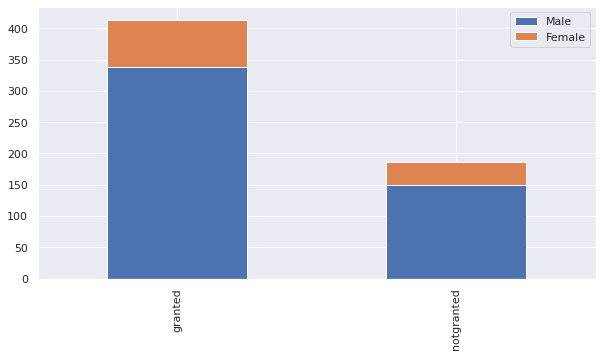

In [400]:
bar_chart('Gender')

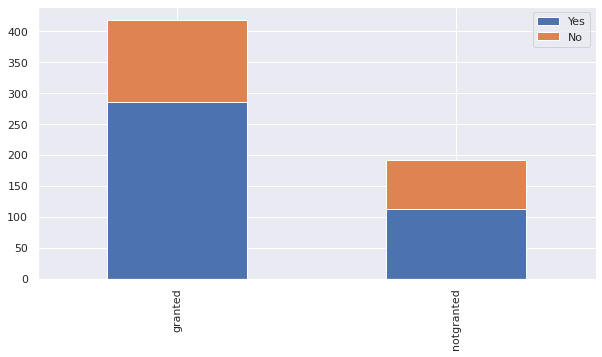

In [401]:
bar_chart('Married')

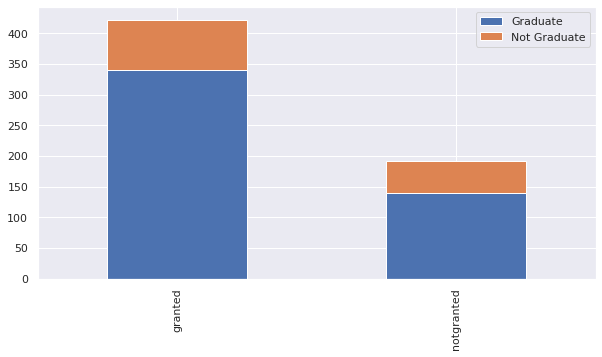

In [402]:
bar_chart('Education')

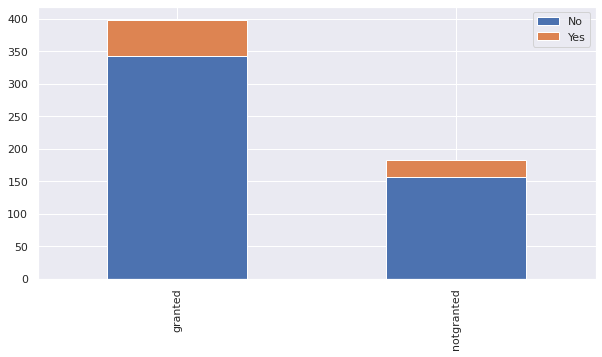

In [403]:
bar_chart('Self_Employed')

**FEATURE ENGINEERING IN BOTH THE SETS**

GENDER

In [0]:
train_df['Gender'].fillna('others',inplace=True)

In [405]:
train_df['Gender'].value_counts()

Male      489
Female    112
others     13
Name: Gender, dtype: int64

In [0]:
test_df['Gender'].fillna('others',inplace=True)

In [0]:
one_hot_encoded_training_predictors = pd.get_dummies(train_df['Gender'])

In [408]:
one_hot_encoded_training_predictors

,Female,Male,others
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
609,1,0,0
610,0,1,0
611,0,1,0
612,0,1,0


In [0]:
frames = [train_df,one_hot_encoded_training_predictors]

In [0]:
train_df= pd.concat(frames,axis='columns')

In [411]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,others
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0


In [0]:
train_df.drop('Gender',axis='columns',inplace=True)

In [0]:
#same goes with the test data

In [414]:
one_hot_encoded_training_predictors = pd.get_dummies(test_df['Gender'])
frames = [test_df,one_hot_encoded_training_predictors]
test_df= pd.concat(frames,axis='columns')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,others
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0,1,0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0,1,0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0,1,0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0,1,0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,1,0


In [0]:
test_df.drop('Gender',axis='columns',inplace=True)

**MARRIED**

In [0]:
train_df['Married'].fillna('Divorced',inplace=True)

In [0]:
test_df['Married'].fillna('Divorced',inplace=True)

In [418]:
train_df['Married'].value_counts()

Yes         398
No          213
Divorced      3
Name: Married, dtype: int64

In [419]:
one_hot_encoded_training_predictors = pd.get_dummies(train_df['Married'])
frames = [train_df,one_hot_encoded_training_predictors]
train_df= pd.concat(frames,axis='columns')
train_df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,others,Divorced,No,Yes
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,0,0,1,0
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,0,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,0,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,0,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0,0,1,0


In [0]:
train_df.rename(columns={'Yes':'Married','No':'Not married'}, inplace=True)

In [421]:
train_df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,others,Divorced,Not married,Married
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,0,0,1,0
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,0,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,0,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,0,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0,0,1,0


In [0]:
train_df.drop('Married',axis=1,inplace=True)

In [423]:
one_hot_encoded_training_predictors = pd.get_dummies(test_df['Married'])
frames = [test_df,one_hot_encoded_training_predictors]
test_df= pd.concat(frames,axis='columns')
test_df.head()

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,others,No,Yes
0,LP001015,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0,1,0,0,1
1,LP001022,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0,1,0,0,1
2,LP001031,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0,1,0,0,1
3,LP001035,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0,1,0,0,1
4,LP001051,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,1,0,1,0


In [0]:
test_df.rename(columns={'Yes':'Marriedcol','No':'Not married'}, inplace=True)

In [0]:
test_df.drop('Married',axis=1,inplace=True)

In [426]:
test_df.head()


,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,others,Not married,Marriedcol
0,LP001015,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,0,1,0,0,1
1,LP001022,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0,1,0,0,1
2,LP001031,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0,1,0,0,1
3,LP001035,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,0,1,0,0,1
4,LP001051,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,0,1,0,1,0


**DEPENDENTS**

In [427]:
train_df.Dependents[train_df.Dependents == '3+'] = 3 
 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [428]:
train_df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [429]:
test_df.Dependents[test_df.Dependents == '3+'] = 3 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**EDUCATION**

In [430]:
train_df.Education[train_df.Education == 'Graduate'] = 1 
train_df.Education[train_df.Education == 'Not Graduate'] = 0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [431]:
train_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,others,Divorced,Not married
0,LP001002,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,0,0,1
1,LP001003,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,0,0
2,LP001005,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,0,0
3,LP001006,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,0,0
4,LP001008,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0,0,1


In [432]:
test_df.Education[test_df.Education == 'Graduate'] = 1 
test_df.Education[test_df.Education == 'Not Graduate'] = 0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


SELF EMPLOYED

In [0]:
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0],inplace=True)

In [0]:
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0],inplace=True)

In [435]:
test_df.Self_Employed[test_df.Self_Employed == 'Yes'] = 1 
test_df.Self_Employed[test_df.Self_Employed == 'No'] = 0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [436]:
train_df.Self_Employed[train_df.Self_Employed == 'Yes'] = 1 
train_df.Self_Employed[train_df.Self_Employed == 'No'] = 0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#ApplicantIncome	

In [438]:
train_df['ApplicantIncome'].isnull().sum()


0

In [439]:
test_df['ApplicantIncome'].isnull().sum()

0

In [0]:
#CoapplicantIncome

In [441]:
train_df['CoapplicantIncome'].isnull().sum()


0

In [442]:
test_df['CoapplicantIncome'].isnull().sum()


0

In [0]:
#Loan_Amount_Term

In [444]:
train_df['Loan_Amount_Term'].isnull().sum()


14

In [0]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0],inplace=True)

In [0]:
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0],inplace=True)

In [447]:
#check
train_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,others,Divorced,Not married
0,LP001002,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1,0,0,1
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1,0,0,0
2,LP001005,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1,0,0,0
3,LP001006,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1,0,0,0
4,LP001008,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1,0,0,1


In [448]:
test_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,others,Not married,Marriedcol
0,LP001015,0,1,0,5720,0,110.0,360.0,1.0,Urban,0,1,0,0,1
1,LP001022,1,1,0,3076,1500,126.0,360.0,1.0,Urban,0,1,0,0,1
2,LP001031,2,1,0,5000,1800,208.0,360.0,1.0,Urban,0,1,0,0,1
3,LP001035,2,1,0,2340,2546,100.0,360.0,NaN,Urban,0,1,0,0,1
4,LP001051,0,0,0,3276,0,78.0,360.0,1.0,Urban,0,1,0,1,0


In [0]:
#Credit_History

In [0]:
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0],inplace=True)

In [0]:
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0],inplace=True)

In [0]:
#Property_Area
#Semiurban    233
#Urban        202
#Rural        179

In [0]:
train_df['Property_Area'].fillna(train_df['Property_Area'].mode()[0],inplace=True)

In [0]:
test_df['Property_Area'].fillna(test_df['Property_Area'].mode()[0],inplace=True)

In [455]:
train_df.Property_Area[train_df.Property_Area == 'Urban'] = 1 
train_df.Property_Area[train_df.Property_Area == 'Semiurban'] =2
train_df.Property_Area[train_df.Property_Area == 'Rural'] =3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [456]:
test_df.Property_Area[test_df.Property_Area == 'Urban'] = 1 
test_df.Property_Area[test_df.Property_Area == 'Semiurban'] =2
test_df.Property_Area[test_df.Property_Area == 'Rural'] =3


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [0]:
#check

In [458]:
train_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,others,Divorced,Not married
0,LP001002,0,1,0,5849,0.0,NaN,360.0,1.0,1,Y,0,1,0,0,1
1,LP001003,1,1,0,4583,1508.0,128.0,360.0,1.0,3,N,0,1,0,0,0
2,LP001005,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y,0,1,0,0,0
3,LP001006,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y,0,1,0,0,0
4,LP001008,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y,0,1,0,0,1


In [459]:
test_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,others,Not married,Marriedcol
0,LP001015,0,1,0,5720,0,110.0,360.0,1.0,1,0,1,0,0,1
1,LP001022,1,1,0,3076,1500,126.0,360.0,1.0,1,0,1,0,0,1
2,LP001031,2,1,0,5000,1800,208.0,360.0,1.0,1,0,1,0,0,1
3,LP001035,2,1,0,2340,2546,100.0,360.0,1.0,1,0,1,0,0,1
4,LP001051,0,0,0,3276,0,78.0,360.0,1.0,1,0,1,0,1,0


In [0]:
#Loan_Amount

In [0]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mode()[0],inplace=True)

In [0]:
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mode()[0],inplace=True)

In [0]:
#drop Loan_id

In [0]:
train_df.drop('Loan_ID',axis='columns',inplace=True)

In [0]:
#test_df.drop('Loan_ID',axis='columns',inplace=True)

In [0]:
#final check before splitting

In [467]:
train_df.head()

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male,others,Divorced,Not married
0,0,1,0,5849,0.0,120.0,360.0,1.0,1,Y,0,1,0,0,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,N,0,1,0,0,0
2,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y,0,1,0,0,0
3,0,0,0,2583,2358.0,120.0,360.0,1.0,1,Y,0,1,0,0,0
4,0,1,0,6000,0.0,141.0,360.0,1.0,1,Y,0,1,0,0,1


In [468]:
test_df.head()

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,others,Not married,Marriedcol
0,LP001015,0,1,0,5720,0,110.0,360.0,1.0,1,0,1,0,0,1
1,LP001022,1,1,0,3076,1500,126.0,360.0,1.0,1,0,1,0,0,1
2,LP001031,2,1,0,5000,1800,208.0,360.0,1.0,1,0,1,0,0,1
3,LP001035,2,1,0,2340,2546,100.0,360.0,1.0,1,0,1,0,0,1
4,LP001051,0,0,0,3276,0,78.0,360.0,1.0,1,0,1,0,1,0


In [0]:
#splitting the train data set
X=train_df.drop('Loan_Status',axis='columns')
y=train_df['Loan_Status']

In [470]:
X

,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Female,Male,others,Divorced,Not married
0,0,1,0,5849,0.0,120.0,360.0,1.0,1,0,1,0,0,1
1,1,1,0,4583,1508.0,128.0,360.0,1.0,3,0,1,0,0,0
2,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,0,0
3,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,0,0
4,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,0,2900,0.0,71.0,360.0,1.0,3,1,0,0,0,1
610,3,1,0,4106,0.0,40.0,180.0,1.0,3,0,1,0,0,0
611,1,1,0,8072,240.0,253.0,360.0,1.0,1,0,1,0,0,0
612,2,1,0,7583,0.0,187.0,360.0,1.0,1,0,1,0,0,0


In [471]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [0]:
#DEPENDENTS

In [0]:
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0],inplace=True)

In [0]:
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0],inplace=True)

In [0]:
#splitting the train data set
X=train_df.drop('Loan_Status',axis='columns')
y=train_df['Loan_Status']

MODELLING

In [0]:

# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np


k fold cross vallidation

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)


In [478]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.66129032 0.72580645 0.67741935 0.61290323 0.70491803 0.70491803
 0.72131148 0.67213115 0.72131148 0.60655738]


In [479]:
round(np.mean(score)*100, 2)

68.09

In [480]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.67741935 0.74193548 0.69354839 0.75806452 0.73770492 0.68852459
 0.80327869 0.62295082 0.63934426 0.6557377 ]


In [481]:
round(np.mean(score)*100, 2)

70.19

In [482]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82258065 0.79032258 0.72580645 0.80645161 0.81967213 0.78688525
 0.81967213 0.72131148 0.83606557 0.80327869]


In [483]:
round(np.mean(score)*100, 2)

79.32

In [484]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.87096774 0.79032258 0.77419355 0.74193548 0.81967213 0.7704918
 0.83606557 0.70491803 0.7704918  0.81967213]


78.99

In [485]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.75806452 0.70967742 0.69354839 0.62903226 0.70491803 0.67213115
 0.73770492 0.68852459 0.6557377  0.62295082]


68.72

TESTING

In [0]:
clf = GaussianNB()
clf.fit(X,y)

test = test_df.drop("Loan_ID", axis=1).copy()
prediction = clf.predict(test)

In [0]:
submission = pd.DataFrame({
        "Loan_ID": test_df['Loan_ID'],
        "Loan_Status": prediction
    })

submission.to_csv('submission.csv', index=False)

In [488]:
submission = pd.read_csv('submission.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
